In [ ]:
from subprocess import call,check_output
import hashlib
m = hashlib.md5()

In [ ]:
command=["darknet","detect","./yolo.cfg","./yolo.weights"]
imagename="petfinderImages/37229968_3.jpg"
m.update(imagename)
image_id = m.hexdigest()
command.append(imagename)
command.append("-prefix")
command.append(image_id)

In [7]:
print command
output = check_output(command)

In [10]:
print output

petfinderImages/37229968_3.jpg: Predicted in 3.756019 seconds.
dog: 84%
dog: 85%
Wrote result to: 4c6a4b98eba78cc6c2c1dac934083c90.csv.



In [11]:
import csv
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

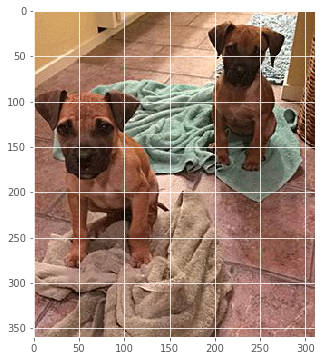

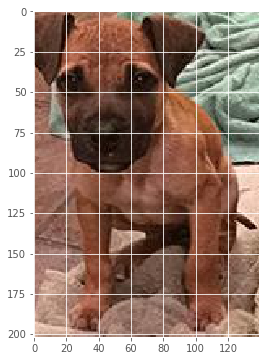

In [12]:
mImg = None
lImg = None
mImgScore = 0
with open(image_id+".csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[-1] != "dog":continue
        score = float(row[-2])
        if score < mImgScore: continue
        mImgScore = score
        imagename=row[0]
        xmin=int(row[4])
        xmax=int(row[5])
        ymin=int(row[6])
        ymax=int(row[7])
        #print row
        img = cv2.imread(imagename)
        lImg = img
        roi = img[ymin:ymax,xmin:xmax]
        mImg = roi
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cv2.cvtColor(lImg, cv2.COLOR_BGR2RGB))
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.imshow(cv2.cvtColor(mImg, cv2.COLOR_BGR2RGB))